In [4]:
%matplotlib inline

#import gym
import gymnasium as gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env = BlackjackEnv()

In [8]:
env.action_space.n

2

In [5]:
def create_random_policy(nA):
    """
    Creates a random policy function.
    
    Args:
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes an observation as input and returns a vector
        of action probabilities
    """
    A = np.ones(nA, dtype=float) / nA
    def policy_fn(observation):
        return A
    return policy_fn

In [9]:
def create_greedy_policy(Q):
    """
    Creates a greedy policy based on Q values.
    
    Args:
        Q: A dictionary that maps from state -> action values
        
    Returns:
        A function that takes an observation as input and returns a vector
        of action probabilities.
    """
    
    def policy_fn(observation):
        # Implement this!
        action_values_given_obs = Q[observation]
        best_action = np.argmax(action_values_given_obs)


        # action_probabilities = np.ones(len(action_values_given_obs))/len(action_values_given_obs)

        # action_values_given_obs[best_action] += (1)
        
        best_action_probabilities = np.zeros(len(action_values_given_obs))
        best_action_probabilities[best_action] =1

        return best_action_probabilities 
    return policy_fn

## Note that our implementation will keep going until an episode ends
### this might cause problems if there are loops or if episodes can become very long

In [17]:
probs = np.array([0.1, 0.1, 0.7, 0.1])

action = np.random.choice(np.arange(len(probs)), p=probs)
np.arange(len(probs))
# for i in range(50):
#     action = np.random.choice(np.arange(len(probs)), p=probs)
#     print(action)

array([0, 1, 2, 3])

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

0.0

In [30]:
def mc_control_importance_sampling(env, num_episodes, behavior_policy, discount_factor=1.0):
    """
    Monte Carlo Control Off-Policy Control using Weighted Importance Sampling.
    Finds an optimal greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        behavior_policy: The behavior to follow while generating episodes.
            A function that given an observation returns a vector of probabilities for each action.
        discount_factor: Gamma discount factor.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities. This is the optimal greedy policy.
    """
    
    # The final action-value function.
    # A dictionary that maps state -> action values
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # initialize C, used to implement importance sampling incrementally:
    C = defaultdict(float) # expected to contains (state, action) pairs as keys

    # Our greedily policy we want to learn
    target_policy = create_greedy_policy(Q)
    
    # Implement this!
    # looping through a target number of episodes:
    for epi in range(num_episodes):
        if epi % 1000 ==0:
            print("\rEpisode {}/{}.".format(epi, num_episodes), end="")
            sys.stdout.flush()

        state = env.reset()
        # going through the epsiode using behavior policy

        state_action_reward_list_current_epi = []
        while True:
            action = np.argmax(np.random.multinomial(1, behavior_policy(state)))
            next_state, reward, done, _ = env.step(action)

            # save the state-action rewards:
            state_action_reward_list_current_epi.append((state, action, reward))

            state = next_state 

            if done:
                break

        # after each episode, going through the state from the terminal state
        # to get the return by adding rewards backward
        # Then correct for the importance
        
        # G records the return:
        G =0

        W = 1 # used to keep track of the required importance sampling ratio
        #i.e. the probability of using targeted policy to walk through the actual trajectory
        # divided by the probability of it happening using behavior policy:

        for state, action, reward in reversed(state_action_reward_list_current_epi):
            # calculate return
            G = discount_factor*G + reward

            # update C 
            C[(state, action)] += W

            # using W and C to update the Q for target policy:

            Q[state][action] += (G - Q[state][action])*W/C[(state, action)]

            if action != np.argmax(target_policy(state)):
                break

            # Calculate  importance sampling ratio for previous step:
            W = W * 1./behavior_policy(state)[action]
            
            
        





    # update target_policy:
    
    #target_policy = create_greedy_policy(Q)

    
        
    return Q, target_policy

In [33]:
random_policy = create_random_policy(env.action_space.n)
Q, policy = mc_control_importance_sampling(env, num_episodes=5000000, behavior_policy=random_policy)

Episode 4999000/5000000.

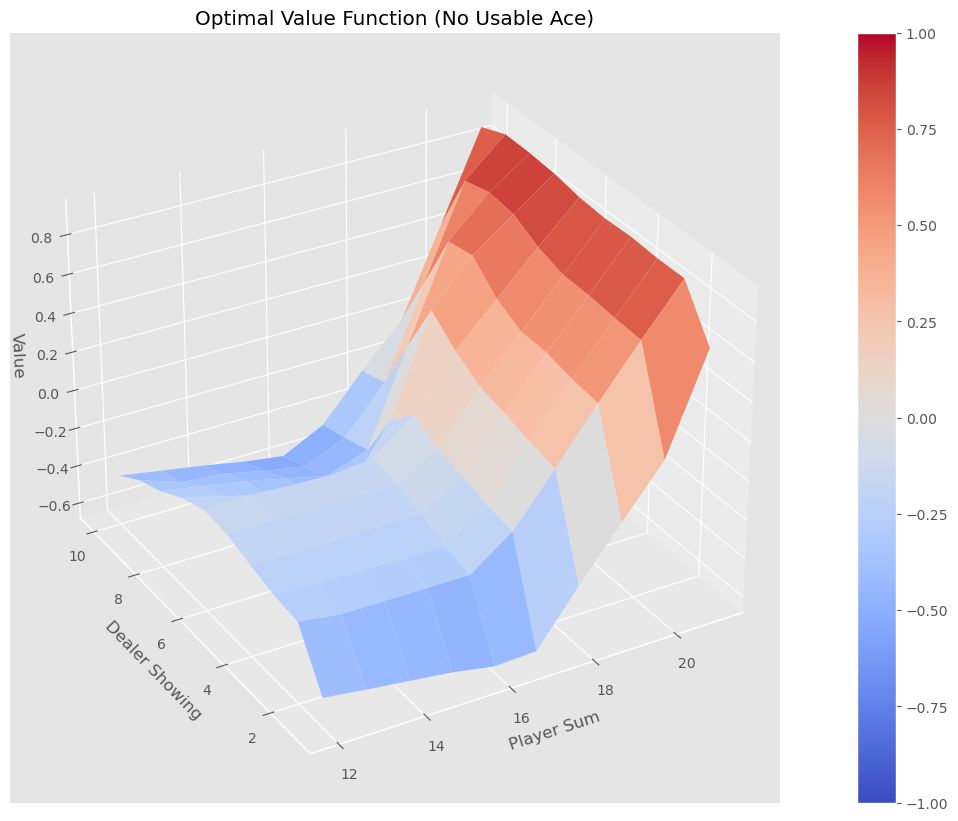

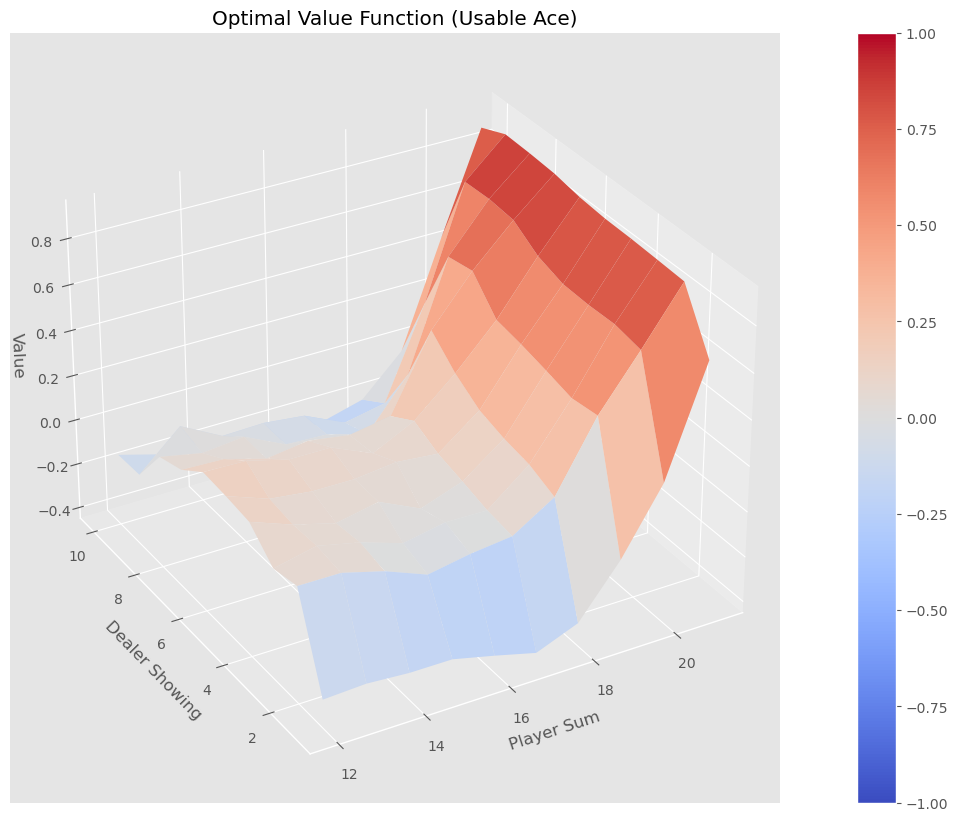

In [34]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, action_values in Q.items():
    action_value = np.max(action_values)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")

# Updating optimal policy at the end:



In [37]:
def mc_control_importance_sampling(env, num_episodes, behavior_policy, discount_factor=1.0):
    """
    Monte Carlo Control Off-Policy Control using Weighted Importance Sampling.
    Finds an optimal greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        behavior_policy: The behavior to follow while generating episodes.
            A function that given an observation returns a vector of probabilities for each action.
        discount_factor: Gamma discount factor.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities. This is the optimal greedy policy.
    """
    
    # The final action-value function.
    # A dictionary that maps state -> action values
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # initialize C, used to implement importance sampling incrementally:
    C = defaultdict(float) # expected to contains (state, action) pairs as keys

    # Our greedily policy we want to learn
    target_policy = create_greedy_policy(Q)
    
    # Implement this!
    # looping through a target number of episodes:
    for epi in range(num_episodes):
        if epi % 1000 ==0:
            print("\rEpisode {}/{}.".format(epi, num_episodes), end="")
            sys.stdout.flush()

        state = env.reset()
        # going through the epsiode using behavior policy

        state_action_reward_list_current_epi = []
        while True:
            action = np.argmax(np.random.multinomial(1, behavior_policy(state)))
            next_state, reward, done, _ = env.step(action)

            # save the state-action rewards:
            state_action_reward_list_current_epi.append((state, action, reward))

            state = next_state 

            if done:
                break

        # after each episode, going through the state from the terminal state
        # to get the return by adding rewards backward
        # Then correct for the importance
        
        # G records the return:
        G =0

        W = 1 # used to keep track of the required importance sampling ratio
        #i.e. the probability of using targeted policy to walk through the actual trajectory
        # divided by the probability of it happening using behavior policy:

        for state, action, reward in reversed(state_action_reward_list_current_epi):
            # calculate return
            G = discount_factor*G + reward

            # update C 
            C[(state, action)] += W

            # using W and C to update the Q for target policy:

            Q[state][action] += (G - Q[state][action])*W/C[(state, action)]

            if action != np.argmax(target_policy(state)):
                break

            # Calculate  importance sampling ratio for previous step:
            W = W * 1./behavior_policy(state)[action]
            
            
        





    # update target_policy:
    
    target_policy = create_greedy_policy(Q)

    
        
    return Q, target_policy

In [38]:
random_policy = create_random_policy(env.action_space.n)
Q, policy = mc_control_importance_sampling(env, num_episodes=5000000, behavior_policy=random_policy)

Episode 4999000/5000000.

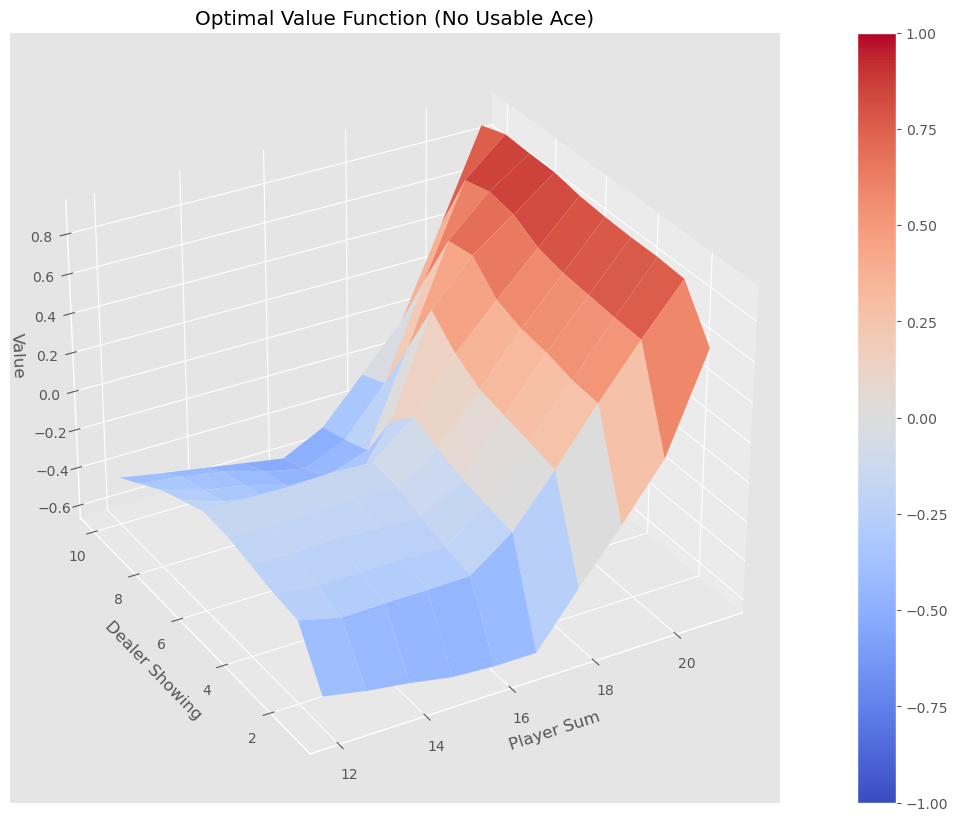

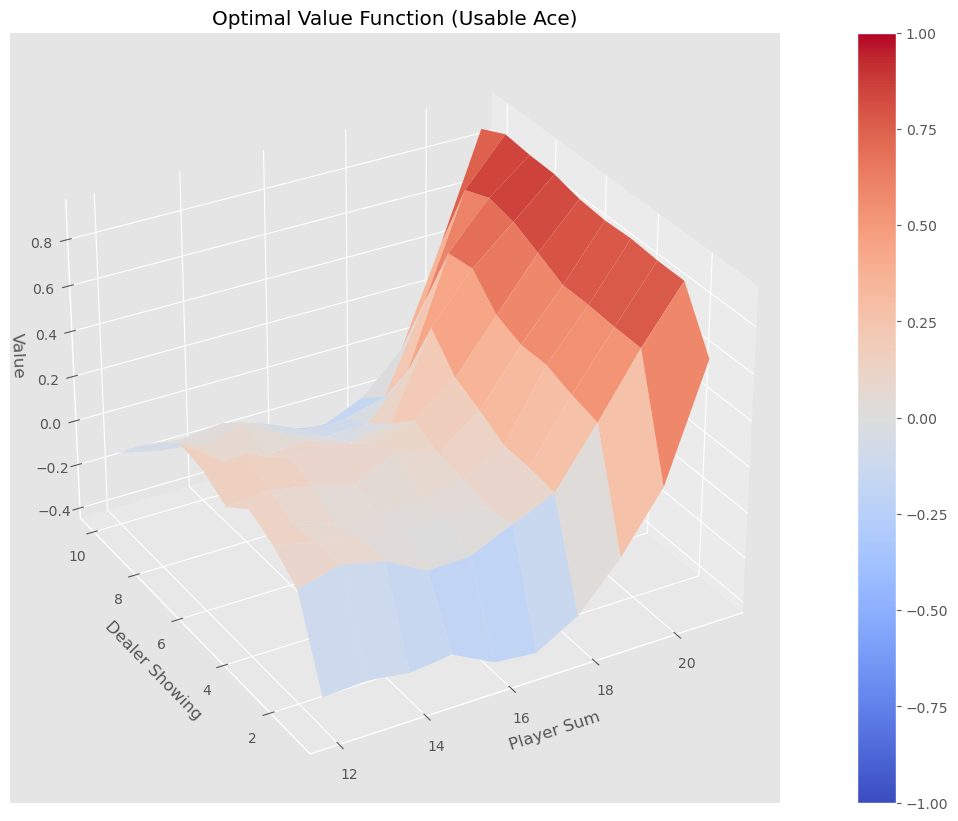

In [39]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, action_values in Q.items():
    action_value = np.max(action_values)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")